This guide uses machine learning to categorize Iris flowers by species. It uses TensorFlow's eager execution to:
1. Build a model
2. Train this model on example data
3. Use the model to make predictions about unknown data.

This guide uses these high-level TensorFlow concepts:

- Enable an eager execution development environment

- Import data with the Datasets API

- Build models and layers with TensorFlow's Keras API.

This tutorial is structured like many TensorFlow programs:

- Import and parse the data sets.

- Select the type of model.

- Train the model.

- Evaluate the model's effectiveness.

- Use the trained model to make predictions.

In [1]:
from __future__ import absolute_import, division, print_function

import os
import matplotlib.pyplot as plt

import tensorflow as tf

tf.enable_eager_execution()

print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 1.14.0-rc1
Eager execution: True


In [3]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))

Local copy of the dataset file: /root/.keras/datasets/iris_training.csv


In [4]:
!head -n5 {train_dataset_fp}

120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0


In [5]:
# column order in CSV file
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


In [0]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

In [7]:
batch_size = 32

train_dataset = tf.contrib.data.make_csv_dataset(
    train_dataset_fp,
    batch_size, 
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)

W0617 15:29:04.523811 140114251753344 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0617 15:29:04.525647 140114251753344 deprecation.py:323] From <ipython-input-7-b631b53c09af>:8: make_csv_dataset (from tensorflow.contrib.data.python.ops.readers) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.data.experimental.make_csv_dataset(...)`.
W0617 15:29:04.549667 140114251753344 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/data/experimental/ops/readers.py:499: parallel_interleave (from tensorflow.python.data.experimental.ops.interleave_ops) is deprecated and will be removed in a fut

In [8]:
features, labels = next(iter(train_dataset))

features

OrderedDict([('sepal_length',
              <tf.Tensor: id=65, shape=(32,), dtype=float32, numpy=
              array([6.1, 6.6, 5. , 5.7, 5. , 6.3, 5. , 4.9, 7.6, 5. , 4.7, 6.2, 4.6,
                     6.4, 5.7, 5.5, 7.7, 5.7, 5. , 5.7, 5.1, 5.4, 6.4, 4.6, 6.7, 6.3,
                     6.3, 6.8, 4.4, 6.1, 6. , 5.4], dtype=float32)>),
             ('sepal_width',
              <tf.Tensor: id=66, shape=(32,), dtype=float32, numpy=
              array([2.9, 3. , 3. , 3.8, 3.5, 3.4, 3.3, 3. , 3. , 3.2, 3.2, 2.8, 3.1,
                     2.8, 2.9, 3.5, 3. , 2.8, 3.6, 3. , 3.8, 3. , 2.7, 3.2, 3.1, 3.3,
                     2.3, 3.2, 3.2, 2.8, 2.7, 3.9], dtype=float32)>),
             ('petal_length',
              <tf.Tensor: id=63, shape=(32,), dtype=float32, numpy=
              array([4.7, 4.4, 1.6, 1.7, 1.3, 5.6, 1.4, 1.4, 6.6, 1.2, 1.6, 4.8, 1.5,
                     5.6, 4.2, 1.3, 6.1, 4.5, 1.4, 4.2, 1.9, 4.5, 5.3, 1.4, 4.4, 6. ,
                     4.4, 5.9, 1.3, 4.7, 5.1, 1.7],

Text(0, 0.5, 'Sepal length')

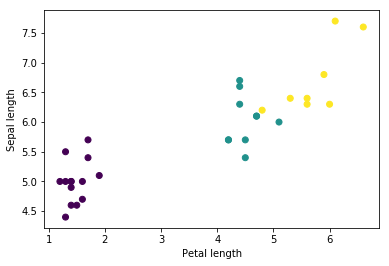

In [9]:
plt.scatter(features['petal_length'].numpy(),
            features['sepal_length'].numpy(),
            c=labels.numpy(),
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")

In [0]:
def pack_features_vector(features, labels):
  """Pack the features into a single array."""
  features =  tf.stack(list(features.values()), axis=1)
  return features, labels

In [0]:
train_dataset = train_dataset.map(pack_features_vector)

In [13]:
features, labels = next(iter(train_dataset))

print(features[:5])

tf.Tensor(
[[6.1 2.9 4.7 1.4]
 [6.6 3.  4.4 1.4]
 [5.  3.  1.6 0.2]
 [5.7 3.8 1.7 0.3]
 [5.  3.5 1.3 0.3]], shape=(5, 4), dtype=float32)


In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(3)
])

In [16]:
prediction = model(features)
prediction[:5]

<tf.Tensor: id=206, shape=(5, 3), dtype=float32, numpy=
array([[-0.73807925, -0.72001195,  3.9652107 ],
       [-0.8796002 , -0.90804076,  4.1701546 ],
       [-0.38150272, -0.5477537 ,  1.9838527 ],
       [-0.41412145, -0.58099455,  2.2231429 ],
       [-0.36383143, -0.51562816,  1.9284368 ]], dtype=float32)>

In [18]:
tf.nn.softmax(prediction[:5])

<tf.Tensor: id=212, shape=(5, 3), dtype=float32, numpy=
array([[0.00890252, 0.00906483, 0.9820326 ],
       [0.00633087, 0.00615335, 0.9875158 ],
       [0.0800342 , 0.06777566, 0.8521901 ],
       [0.06320623, 0.05349186, 0.8833019 ],
       [0.08505915, 0.07307968, 0.8418612 ]], dtype=float32)>

In [45]:
print("Predictions: {}".format(tf.argmax(prediction, axis=1)))
print("     Labels: {}".format(labels))

Predictions: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
     Labels: [1 1 0 0 0 2 0 0 2 0 0 2 0 2 1 0 2 1 0 1 0 1 2 0 1 2 1 2 0 1 1 0]


In [44]:
def loss(model, x, y):
  y_ = model(x)
  return tf.losses.sparse_softmax_cross_entropy(labels=y, logits=y_)

l = loss(model,features, labels)
print("Loss test: {}".format(l))

Loss test: 2.5289506912231445


In [0]:
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

global_step = tf.Variable(0)

In [56]:
loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(global_step.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables), global_step)

print("Step: {},         Loss: {}".format(global_step.numpy(),
                                          loss(model, features, labels).numpy()))

Step: 0, Initial Loss: 2.5289506912231445
Step: 1,         Loss: 1.7275300025939941


In [60]:
from tensorflow import contrib
tfe= contrib.eager

train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
  epoch_loss_avg = tfe.metrics.Mean()
  epoch_accuracy = tfe.metrics.Accuracy()
  
  for x, y in train_dataset:
    loss_value, grads= grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables),
                             global_step)
    
    epoch_loss_avg(loss_value)
    epoch_accuracy(tf.argmax(model(x), axis=1, output_type=tf.int32), y)
    
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())
  
  if epoch % 50 == 0:
    print("Epoch {:03d}:  Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                 epoch_loss_avg.result(),
                                                                 epoch_accuracy.result()))

Epoch 000:  Loss: 1.233, Accuracy: 35.000%
Epoch 050:  Loss: 0.629, Accuracy: 81.667%
Epoch 100:  Loss: 0.360, Accuracy: 96.667%
Epoch 150:  Loss: 0.241, Accuracy: 95.833%
Epoch 200:  Loss: 0.177, Accuracy: 95.833%


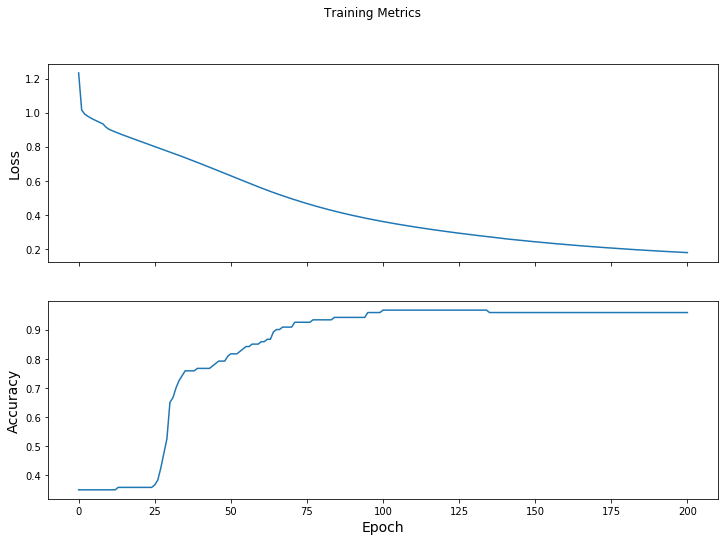

In [62]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results);

In [63]:
test_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"

test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url),
                                  origin=test_url)

8192/573 [============================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step


In [0]:
test_dataset = tf.contrib.data.make_csv_dataset(
test_fp,
batch_size,
column_names=column_names,
label_name='species',
num_epochs=1,
shuffle=False)

test_dataset = test_dataset.map(pack_features_vector)

In [65]:
test_accuracy = tfe.metrics.Accuracy()

for (x, y) in test_dataset:
  logits = model(x)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)
  
print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 96.667%


In [66]:
tf.stack([y, prediction],axis=1)

<tf.Tensor: id=106764, shape=(30, 2), dtype=int32, numpy=
array([[1, 1],
       [2, 2],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [2, 2],
       [1, 1],
       [2, 2],
       [2, 2],
       [0, 0],
       [2, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1]], dtype=int32)>

In [83]:
predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5],
    [5.9, 3.0, 4.2, 1.5],
    [6.9, 3.1, 5.4, 2.1]
])

prediction = model(predict_dataset)
  
for i, logits in enumerate(predictions):
  class_idx = tf.argmax(logits).numpy()
  p = tf.nn.softmax(logits)[class_idx]
  name = class_names[class_idx]
                         
  print ("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

Example 0 prediction: Iris setosa (97.0%)
Example 1 prediction: Iris versicolor (83.6%)
Example 2 prediction: Iris virginica (75.6%)
